<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/CO2richandwater.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Thermodynamics of CO2 rich gases and water
#@markdown This notbook gives an introduction to phase behaviour of CO2 in aqueous solutions.
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

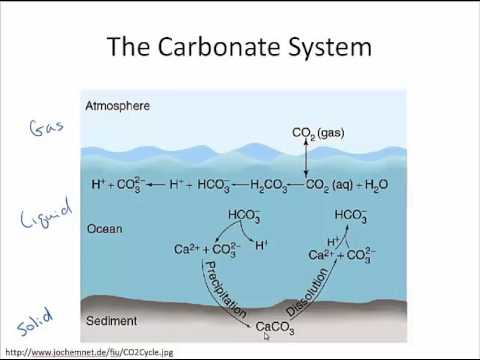

In [2]:
#@title  Water Chemistry and Alkalinity
from IPython.display import YouTubeVideo
YouTubeVideo('FVhR1wAj1Dg', width=600, height=400)

#Mutual solubility in a CO2-water system 

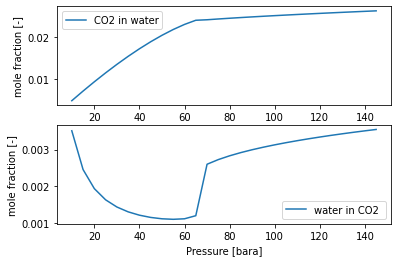

In [18]:
componentName = 'CO2'
temperature = 25.0   #@param {type:"number"}
minPressure =   10.0#@param {type:"number"}
maxPressure = 150.0  #@param {type:"number"}
eosname = "cpa" #@param ["srk", "pr", "cpa"]
R = 8.314 # J/mol/K

# Creating a fluid in neqsim
fluid1 = fluid(eosname) #create a fluid using the SRK-EoS
fluid1.addComponent(componentName, 1.0) #adding 1 mole to the fluid
fluid1.addComponent("water", 1.0) #adding 1 mole to the fluid
fluid1.setMixingRule(10)
fluid1.setMultiPhaseCheck(True)

def gassol(pressure, temperature):
    fluid1.setPressure(pressure, 'bara')
    fluid1.setTemperature(temperature, 'C')
    TPflash(fluid1)
    return fluid1.getPhase('aqueous').getComponent(componentName).getx()

def watersol(pressure, temperature):
    fluid1.setPressure(pressure, 'bara')
    fluid1.setTemperature(temperature, 'C')
    TPflash(fluid1)
    return fluid1.getPhase(0).getComponent('water').getx()

pressure = np.arange(minPressure, maxPressure, int((maxPressure-minPressure)/30.0)+1.0)
gassolubuility = [gassol(P,temperature) for P in pressure]
watersolubuility = [watersol(P,temperature) for P in pressure]

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(pressure, gassolubuility)
plt.xlabel('Pressure [bar]')
plt.ylabel('mole fraction [-]')
plt.legend(['CO2 in water'])
plt.subplot(2, 1, 2)
plt.plot(pressure, watersolubuility, '-')
plt.xlabel('Pressure [bara]')
plt.ylabel('mole fraction [-]')
plt.legend(['water in CO2 '])

#Solubility of a CO2 rich natural gas in water

In [4]:
from neqsim.thermo import TPflash, fluid, fluid_df, addOilFractions, printFrame, dataFrame, fluidcreator,createfluid,createfluid2, TPflash, phaseenvelope
import pandas as pd

reservoirfluid = fluid('Electrolyte-CPA-EoS')
reservoirfluid.addComponent("CO2", 1.0)
reservoirfluid.addComponent("nitrogen", 1.0)
reservoirfluid.addComponent("methane", 70.0)
reservoirfluid.addComponent("ethane", 4.3)
reservoirfluid.addComponent("water", 5.0,"kg/sec")
reservoirfluid.addComponent("Na+", 0.010)
reservoirfluid.addComponent("Cl-", 0.01)
reservoirfluid.addComponent("OH-", 0.0001)

reservoirfluid.chemicalReactionInit()
reservoirfluid.setMultiPhaseCheck(True)
reservoirfluid.setMixingRule(10)

reservoirfluid.setTotalFlowRate(1.0, "MSm3/day")
reservoirfluid.setTemperature(55.0, "C")
reservoirfluid.setPressure(15.0, "bara")



TPflash(reservoirfluid)
printFrame(reservoirfluid)
print('pH of water phase ', reservoirfluid.getPhase('aqueous').getpH())

                           total                          gas                      aqueous                     
                CO2   2.82472E-3                   1.27943E-2                   5.04834E-5      [mole fraction]
           nitrogen   2.82592E-3                    1.2946E-2                    9.0136E-6      [mole fraction]
            methane   1.97815E-1                   9.07626E-1                   2.39569E-4      [mole fraction]
             ethane   1.21515E-2                   5.57145E-2                   2.57662E-5      [mole fraction]
              water   7.84323E-1                   1.09195E-2                   9.99601E-1      [mole fraction]
                Na+   2.82592E-5                  3.61252E-45                   3.61252E-5      [mole fraction]
                Cl-   2.82592E-5                  3.61252E-45                   3.61252E-5      [mole fraction]
                OH-  2.85803E-11                  5.72578E-42                  3.65356E-11      [mole fr